In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path('..').resolve()))
sys.path.append(str(Path('../..').resolve()))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from datetime import timedelta

from fmpy import simulate_fmu

from devs_fmu.bouncing_ball import BouncingBall
from devs_fmu.simulator import simulator

from config import REFERENCE_FMUS_DIR, OPENMODELICA_FMUS_DIR

In [3]:
def simulate_fmu(fmu_path):
    simulator.reset()
    m = BouncingBall(fmu_path)

    step_size = 1e-2
    time_list = np.arange(0, 3, step_size)
    height_list = []
    velocity_list = []
    
    for time in time_list:
        height_list.append(m.get_height())
        velocity_list.append(m.get_velocity())
        simulator.advance(timedelta(seconds=step_size))
    
    return time_list, height_list, velocity_list

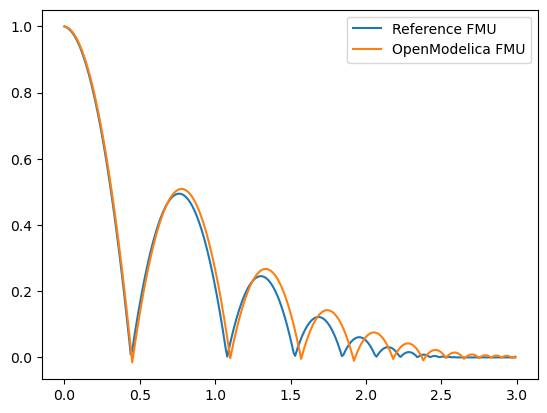

In [4]:
time_list, height_list, velocity_list = simulate_fmu(REFERENCE_FMUS_DIR / '2.0/BouncingBall.fmu')
plt.plot(time_list, height_list, label='Reference FMU')

time_list, height_list, velocity_list = simulate_fmu(OPENMODELICA_FMUS_DIR / 'BouncingBall.fmu')
plt.plot(time_list, height_list, label='OpenModelica FMU')

plt.legend()
plt.show()

In [5]:
def change_state(m):
    m.set_height(1)
    m.set_velocity(0)


def simulate_fmu_with_event(fmu_path):
    simulator.reset()
    m = BouncingBall(fmu_path)
    
    simulator.schedule(
        timedelta(seconds=1),
        change_state,
        m
    )
        
    step_size = 1e-2
    time_list = np.arange(0, 3, step_size)
    height_list = []
    velocity_list = []
    
    for time in time_list:
        height_list.append(m.get_height())
        velocity_list.append(m.get_velocity())
        simulator.advance(timedelta(seconds=step_size))
    
    return time_list, height_list, velocity_list

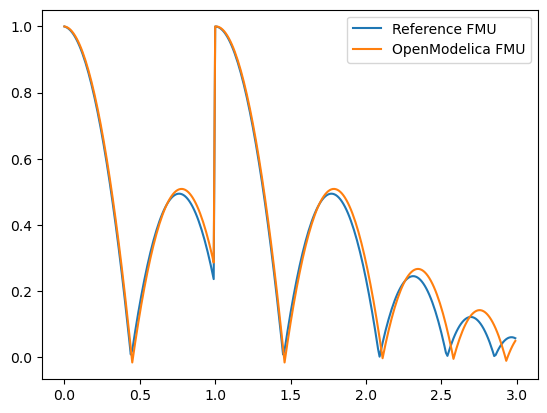

In [6]:
time_list, height_list, velocity_list = simulate_fmu_with_event(REFERENCE_FMUS_DIR / '2.0/BouncingBall.fmu')
plt.plot(time_list, height_list, label='Reference FMU')

time_list, height_list, velocity_list = simulate_fmu_with_event(OPENMODELICA_FMUS_DIR / 'BouncingBall.fmu')
plt.plot(time_list, height_list, label='OpenModelica FMU')

plt.legend()
plt.show()